In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [7]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "Iris.csv" with length 5107 bytes


In [8]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['SepalLengthCm'].corr(df['SepalWidthCm'])

-0.10936924995064937

In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [0]:
import seaborn as sns

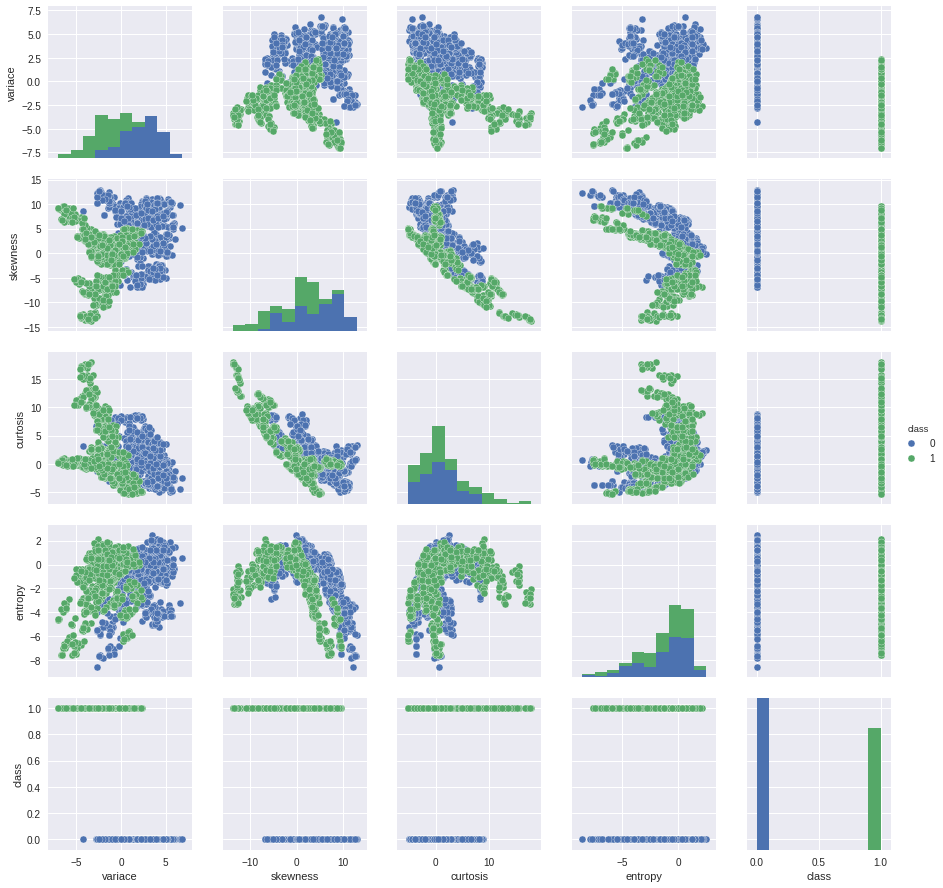

In [0]:
sns.pairplot(df,hue='class')

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [0]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [0]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.99344978, 0.9868709 , 0.99781182])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [0]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20)
result = model.evaluate(X_test, y_test)

Epoch 1/20
960/960 [==============================] - 0s 149us/step - loss: 1.4375 - acc: 0.3698
Epoch 2/20
960/960 [==============================] - 0s 36us/step - loss: 1.2587 - acc: 0.3854
Epoch 3/20
960/960 [==============================] - 0s 36us/step - loss: 1.1007 - acc: 0.4094
Epoch 4/20
960/960 [==============================] - 0s 33us/step - loss: 0.9661 - acc: 0.4271
Epoch 5/20
960/960 [==============================] - 0s 32us/step - loss: 0.8558 - acc: 0.4521
Epoch 6/20
960/960 [==============================] - 0s 36us/step - loss: 0.7683 - acc: 0.5094
Epoch 7/20
960/960 [==============================] - 0s 35us/step - loss: 0.6996 - acc: 0.5750
Epoch 8/20
960/960 [==============================] - 0s 33us/step - loss: 0.6457 - acc: 0.6125
Epoch 9/20
960/960 [==============================] - 0s 35us/step - loss: 0.6028 - acc: 0.6750
Epoch 10/20
960/960 [==============================] - 0s 33us/step - loss: 0.5682 - acc: 0.7312
Epoch 11/20
960/960 [=================

In [0]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,acc,loss
0,0.369792,1.437528
1,0.385417,1.258695
2,0.409375,1.100735
3,0.427083,0.966141
4,0.452083,0.855801


Text(0.5, 1.0, 'Test accuracy: 81.8 %')

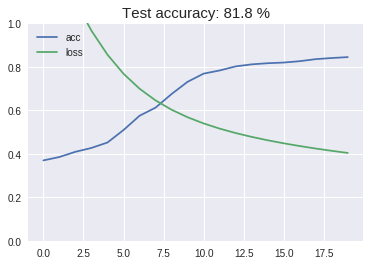

In [0]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

In [0]:
## Learning Rates

In [0]:
dflist = []
a=pd.DataFrame(columns=('acc','loss'))

learning_rates = [0.01]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    #dflist.append(pd.DataFrame(h.history, index=h.epoch))
    #b=pd.DataFrame(h.history, index=h.epoch)
    #print(b)
    #a.append(b,ignore_index=True)
    #print(a)
    
    a=a.append(h.history, ignore_index=True)

In [0]:
for i in range(5):
  df.append({'A': i},{'B':i}, ignore_index=True)

TypeError: ignored

In [0]:
df

,variace,skewness,curtosis,entropy,class,A
0,3.621600,8.66610,-2.807300,-0.446990,0.0,NaN
1,4.545900,8.16740,-2.458600,-1.462100,0.0,NaN
2,3.866000,-2.63830,1.924200,0.106450,0.0,NaN
3,3.456600,9.52280,-4.011200,-3.594400,0.0,NaN
4,0.329240,-4.45520,4.571800,-0.988800,0.0,NaN
5,4.368400,9.67180,-3.960600,-3.162500,0.0,NaN
6,3.591200,3.01290,0.728880,0.564210,0.0,NaN
7,2.092200,-6.81000,8.463600,-0.602160,0.0,NaN
8,3.203200,5.75880,-0.753450,-0.612510,0.0,NaN
9,1.535600,9.17720,-2.271800,-0.735350,0.0,NaN


In [0]:
h.history

{'acc': [0.41770833333333335], 'loss': [0.8766008367141088]}

In [0]:
print(pd.DataFrame(h.history))
pd.DataFrame(columns=('accuracy','loss'))

        acc      loss
0  0.361458  0.888591


,accuracy,loss


In [0]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [0]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [0]:
dflist

[        acc      loss
 0  0.417708  1.163465,    acc      loss
 0  0.8  0.451862,         acc      loss
 0  0.232292  1.457496,         acc      loss
 0  0.522917  0.891855]